## **Prediction Using Supervised ML**
In this section we will see how the Python Pandas and NumPy libraries for machine learning can be used to implement regression functions. We will start with simple linear regression involving two variables.
### **Simple Linear Regression**
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

### *Author: Sidhartha Das*

In [1]:
#importing the required python libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

**The data is provided through an external Link. So we will import the data here first.**

In [2]:
#importing/reading data from the external link
url='http://bit.ly/w-data'
data=pd.read_csv(url)
print('Data has been imported and read')
data.head(5)

Data has been imported and read


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


**Pandas have a function describe() which describes the data in terms of mean, minimum, maximum etc**

In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
#importing the data without the headers
df=pd.read_csv(url,header=None)
df=df.drop(0)
df=df.reset_index(drop=True)

**Now we will analyse the data provided thorugh a Graph plotted using Matplotlib Library**

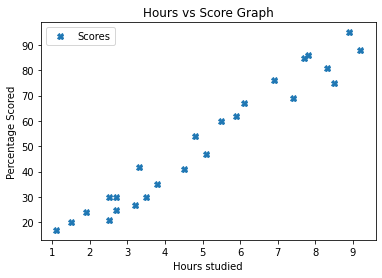

In [5]:
#plotting the data on a graph to visualise the information
data.plot(x='Hours', y='Scores', style='X')  
plt.xlabel("Hours studied")
plt.ylabel("Percentage Scored")
plt.title("Hours vs Score Graph")
plt.show()

In [6]:
X=data.iloc[:,:-1].values
y=data.iloc[:,1].values
m=len(y)

In [7]:
X=X[:,np.newaxis]

In [8]:
X=X[:,:,0]

In [9]:
y=y[:,np.newaxis]

**Machine Learning Linear Regression Algorithm Part**

In [10]:
theta=np.zeros([2,1])
iterations=2000
alpha=0.01
ones=np.ones((m,1))
X=np.hstack((ones,X))

In [11]:
def computeCost(X,y,theta):
    temp=np.dot(X,theta)-y
    return np.sum(np.power(temp,2))/(2*m)

In [12]:
def gradientDescent(X,y,theta,alpha,iterations):
    for i in range(iterations):
        temp=np.dot(X,theta)-y
        temp=np.dot(X.T,temp)
        theta=theta-(alpha/m)*temp
    return theta
theta=gradientDescent(X,y,theta,alpha,iterations)
print(theta)

[[2.46438177]
 [9.77891737]]


**Here is the plot after our ML model is deployed**

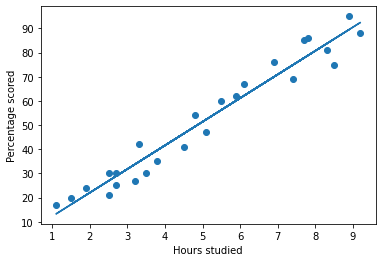

In [13]:
plt.scatter(X[:,1],y)
plt.xlabel('Hours studied')
plt.ylabel('Percentage scored')
plt.plot(X[:,1],np.dot(X,theta))
plt.show()

**With the ML Model now we will predict the percentage scored if a studies for 9.25 hours per day!**

In [19]:
hrs=9.25
percentage=float(theta[0]+(theta[1]*hrs))
print("Percentage scored if a student studies for 9.25 hours/day is:",round(percentage,2),"%")

Percentage scored if a student studies for 9.25 hours/day is: 92.92 %


In [26]:
predictions=[]
for i in range(len(X)):
    predict=float((X[i][0]*theta[0])+(X[i][1]*theta[1]))
    predictions.append(predict)

In [29]:
new_df = pd.DataFrame({'Actual':data.iloc[:,1].values, 'Predicted':predictions})  
new_df 

,Actual,Predicted
0,21,26.911675
1,47,52.336860
2,27,33.756917
3,75,85.585179
4,30,36.690593
5,20,17.132758
6,88,92.430422
7,60,56.248427
8,81,83.629396
9,25,28.867459


**Finding the Mean Absolute Error**

In [38]:
sum=0
for i in range(25):
    sum=sum+(float(new_df.Predicted[i]-new_df.Actual[i]))
print("Mean Absolute error is:",sum/25)

Mean Absolute error is: -0.003684380966155345


# Conclusion

## If a student studies for 9.25 hours/day, he may score 92.92±3.68%(Approx)